# Loading Data

In [2]:
from google.colab import files
uploads=files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 70 Nov 14 04:41 kaggle.json


In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!pip install kaggle

    100% |████████████████████████████████| 61kB 2.4MB/s 
    100% |████████████████████████████████| 235kB 6.3MB/s 
  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /root/.cache/pip/wheels/8b/21/3b/a0076243c6ae12a6215b2da515fe06b539aee7217b406e510e
  Running setup.py bdist_wheel for python-slugify ... - done
  Stored in directory: /root/.cache/pip/wheels/e3/65/da/2045deea3098ed7471eca0e2460cfbd3fdfe8c1d6fa6fcac92
Successfully built kaggle python-slugify


In [7]:
!kaggle datasets download -d snap/amazon-fine-food-reviews
#!kaggle competitions download -c tgs-salt-identification-challenge

 98% 245M/251M [00:01<00:00, 164MB/s]
100% 251M/251M [00:01<00:00, 166MB/s]


In [0]:
import zipfile
zip_ref = zipfile.ZipFile("amazon-fine-food-reviews.zip", 'r')
zip_ref.extractall("amazon")
zip_ref.close()

In [9]:
!pip install gensim

    100% |████████████████████████████████| 23.6MB 1.3MB/s 
    100% |████████████████████████████████| 1.4MB 12.8MB/s 
    100% |████████████████████████████████| 133kB 11.6MB/s 
    100% |████████████████████████████████| 61kB 20.4MB/s 
    100% |████████████████████████████████| 4.8MB 6.0MB/s 
    100% |████████████████████████████████| 552kB 21.6MB/s 
  Running setup.py bdist_wheel for smart-open ... - \ done
  Stored in directory: /root/.cache/pip/wheels/23/00/44/e5b939f7a80c04e32297dbd6d96fa3065af89ecf57e2b5f89f
  Running setup.py bdist_wheel for bz2file ... - done
  Stored in directory: /root/.cache/pip/wheels/81/75/d6/e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file


In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3

import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle



#Data Preprocessing

In [0]:
con = sqlite3.connect('amazon/database.sqlite') 

In [0]:
filtered_data = pd.read_sql_query(""" SELECT * FROM Reviews WHERE Score != 3 """, con)

In [0]:
def partition(x):
    if x < 3:
        return 'negative'
    return 'positive'

In [0]:
actualScore = filtered_data['Score']
positiveNegative = actualScore.map(partition) 
filtered_data['Score'] = positiveNegative

In [15]:
print(filtered_data.shape) #looking at the number of attributes and size of the data
filtered_data.head()

(525814, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [16]:
display= pd.read_sql_query("""
SELECT *
FROM Reviews
WHERE Score != 3 AND UserId="AR5J8UI46CURR"
ORDER BY ProductID
""", con)
display.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,78445,B000HDL1RQ,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
1,138317,B000HDOPYC,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
2,138277,B000HDOPYM,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
3,73791,B000HDOPZG,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
4,155049,B000PAQ75C,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...


In [0]:
sorted_data=filtered_data.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [18]:
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final.shape

(364173, 10)

In [19]:
(final['Id'].size*1.0)/(filtered_data['Id'].size*1.0)*100

69.25890143662969

In [20]:
display= pd.read_sql_query("""
SELECT *
FROM Reviews
WHERE Score != 3 AND Id=44737 OR Id=64422
ORDER BY ProductID
""", con)

display.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...
1,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...


In [0]:
final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]

In [22]:
final['Score'].value_counts()

positive    307061
negative     57110
Name: Score, dtype: int64

In [23]:

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:

stop = set(stopwords.words('english'))
sno = nltk.stem.SnowballStemmer('english')

def cleanhtml(sentence): 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned


In [0]:
final.sort_values(by='Time',inplace=True)

In [0]:
i=0
str1=' '
final_string=[]
all_positive_words=[]
all_negative_words=[]
s=''
for sent in final['Text'].values:
    filtered_sentence=[]
    
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (final['Score'].values)[i] == 'positive': 
                        all_positive_words.append(s) 
                    if(final['Score'].values)[i] == 'negative':
                        all_negative_words.append(s) 
                else:
                    continue
            else:
                continue 
    str1 = b" ".join(filtered_sentence)
    
    
    final_string.append(str1)
    i+=1

In [0]:
final['CleanedText']=final_string 
final['CleanedText']=final['CleanedText'].str.decode("utf-8")

In [0]:

final_data=final.head(10**5)

In [0]:
final_data.to_pickle('finalraw_data')

In [0]:
train_data=final_data.head(60000)
#cv_data=final_data[60000:80000]
test_data=final_data[60000:100000]


In [31]:
train_data.shape

(60000, 11)

In [32]:
test_data.shape

(40000, 11)

In [0]:
def transform(x):
  if x=='positive':
    return 1
  else:
    return -1

In [0]:
y_=train_data['Score'].apply(transform)
y_test=test_data['Score'].apply(transform)
y_train=np.array(y_)
y_test=np.array(y_test)

In [35]:
y_.value_counts()

 1    53147
-1     6853
Name: Score, dtype: int64

In [36]:
a=53147
b=6853
print(a/(a+b))
print(b/(a+b))

0.8857833333333334
0.11421666666666666


# Bag of Words

In [37]:
count_vect = CountVectorizer()
bag_of_words = count_vect.fit_transform(train_data['CleanedText'].values)
print("the type of count vectorizer ",type(bag_of_words))
print("the shape of out text BOW vectorizer ",bag_of_words.get_shape())
print("the number of unique words ", bag_of_words.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (60000, 29132)
the number of unique words  29132


In [0]:
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#X_train_1=scaler.fit_transform(svd_bag_of_words)
X_train_1=bag_of_words

In [39]:
X_train_1.shape

(60000, 29132)

In [0]:
test_bag_of_words=count_vect.transform(test_data['CleanedText'])
X_test_1=test_bag_of_words
#X_test_1=X_train_1=scaler.transform(svd_test_bag_of_words)


In [41]:
X_test_1.shape

(40000, 29132)

In [0]:
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

In [0]:
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]
clf=LogisticRegression()
model = GridSearchCV(clf, tuned_parameters, scoring = 'f1', cv=5,n_jobs=1)
model.fit(X_train_1, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'C': [0.0001, 0.01, 1, 100, 10000]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='f1', verbose=0)

In [0]:
print(model.best_estimator_)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [0]:
model.grid_scores_

[mean: 0.93943, std: 0.00002, params: {'C': 0.0001},
 mean: 0.95239, std: 0.00052, params: {'C': 0.01},
 mean: 0.95881, std: 0.00126, params: {'C': 1},
 mean: 0.95285, std: 0.00125, params: {'C': 100},
 mean: 0.95218, std: 0.00153, params: {'C': 10000}]

In [0]:
print(model.score(X_test_1, y_test))

0.9542505974735405


In [0]:
clf=LogisticRegression()
C=np.random.uniform(10**-2,10,size=20)
hyperparameters = dict(C=C)
model = RandomizedSearchCV(clf,param_distributions=hyperparameters, refit=True,scoring ='f1', cv=5,n_jobs=1)
model.fit(X_train_1, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'C': array([1.81037, 3.42346, 9.8302 , 7.25036, 3.74168, 6.94993, 0.5164 ,
       6.18936, 4.40118, 5.59343, 6.3382 , 2.41935, 0.294  , 0.6418 ,
       7.93132, 3.46398, 1.74923, 3.747  , 4.82491, 2.57804])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='f1', verbose=0)

In [0]:
print(model.best_estimator_)

LogisticRegression(C=0.5164027376588135, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


In [0]:
lgr=LogisticRegression(C=1,dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
lgr.fit(X_train_1,y_train)
y_pred=lgr.predict(X_test_1)
cm=confusion_matrix(y_test,y_pred)
print("CM for L1")
cm

CM for L1


array([[ 3242,  2176],
       [ 1008, 33574]])

In [0]:
lgr=LogisticRegression(C=1, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
lgr.fit(X_train_1,y_train)
y_pred=lgr.predict(X_test_1)
cm=confusion_matrix(y_test,y_pred)
print("CM for L2")
cm

CM for L2


array([[ 3244,  2174],
       [ 1042, 33540]])

CM for GridSearch
[[ 3244  2174]
 [ 1042 33540]]


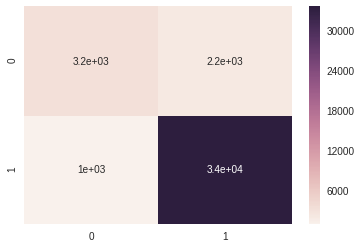

In [0]:
print("CM for GridSearch")
import seaborn as sns
print(cm)
sns.heatmap(cm,annot=True)

In [0]:
C_values=[1000,100,1,0.1,0.01,0.001,0.0001]
for val in C_values:
  clf=LogisticRegression(C=val,penalty='l1')
  clf.fit(X_train_1,y_train)
  w=clf.coef_
  count = np.count_nonzero(w)
  lamda=1/val
  print("Number of Non-Zero Coefficients for lamda = {} is {}".format(lamda,count))

Number of Non-Zero Coefficients for lamda = 0.001 is 13803
Number of Non-Zero Coefficients for lamda = 0.01 is 10025
Number of Non-Zero Coefficients for lamda = 1.0 is 3366
Number of Non-Zero Coefficients for lamda = 10.0 is 688
Number of Non-Zero Coefficients for lamda = 100.0 is 95
Number of Non-Zero Coefficients for lamda = 1000.0 is 3
Number of Non-Zero Coefficients for lamda = 10000.0 is 0


In [43]:
estimator1=LogisticRegression(C=1,
          dual=False, fit_intercept=True, intercept_scaling=1,
          max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2',
          random_state=None, solver='liblinear', tol=0.0001, verbose=0,
          warm_start=False)
estimator1.fit(bag_of_words,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
estimator1_features=[abs(x) for x in estimator1.coef_]
estimator1_indeces=np.argsort(estimator1_features)
print("indecesfirst 10 importent features in AVG Word to vec are ")
print(estimator1_indeces.flatten()[0:10])
print("feature Weights are")
print(np.sort(estimator1_features).flatten()[0:10])

indecesfirst 10 importent features in AVG Word to vec are 
[ 5311  9438 11628  7292 18197 24128 13738 24888 24884  1570]
feature Weights are
[6.49342951e-10 1.03189967e-09 1.09900785e-09 1.09900785e-09
 1.29868590e-09 1.85227859e-09 2.60344821e-09 2.91337213e-09
 2.91337213e-09 2.91337213e-09]


In [0]:
X_train_1.data=+np.random.normal(0, 0.01,1777955)

In [0]:
X_train_1.shape

(60000, 29132)

In [0]:
estimator2=LogisticRegression(C=1,
          dual=False, fit_intercept=True, intercept_scaling=1,
          max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2',
          random_state=None, solver='liblinear', tol=0.0001, verbose=0,
          warm_start=False)
estimator2.fit(X_train_1,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
coef1=estimator1.coef_.flatten()

coef2=estimator2.coef_.flatten()

In [0]:
percentage_changes=[]
for i in range(len(coef1)):
  diff=(coef1[i]-coef2[i])/coef1[i]
  percentage_changes.append(diff*100)
  

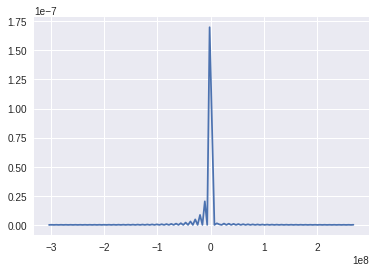

In [0]:
#diff_w=np.array(estimator1_features) - np.array(estimator2_features)
sns.kdeplot(np.array(percentage_changes))

Text(0,0.5,'% change in weights')

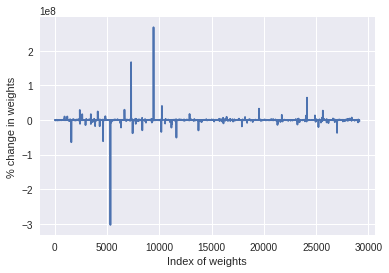

In [0]:

plt.plot(range(0,29132),percentage_changes)
plt.xlabel("Index of weights")
plt.ylabel("% change in weights")

*There  is no much percentage change in Weights so there is no much multicolinearity among the weights *

In [0]:
coef1=[abs(x) for x in coef]

In [0]:
indeces_weights=np.array(coef1).argsort()

In [48]:
indeces_weights[-20:]

array([ 7159, 28953, 26620,  7285, 14224,  5495,  2585, 26688,  9423,
       28941, 23180, 12129,  5298, 25754,  1638, 25497, 27025, 25263,
       23595, 28599])

In [0]:
weights=np.take(coef,indeces_weights[-20:])

In [0]:
sign=[]
for val in weights:
  if val>0:
    sign.append("+")
  else:
    sign.append("-")
    

In [0]:
importent_features=np.take(count_vect.get_feature_names(),indeces_weights[-20:])

In [54]:
importent_features

array(['disappoint', 'yum', 'ugh', 'dissapoint', 'landfil', 'consequ',
       'bland', 'unappet', 'flavorless', 'yuck', 'skeptic', 'horribl',
       'compass', 'threw', 'aw', 'terribl', 'unpleas', 'tasteless',
       'solv', 'worst'], dtype='<U30')

In [0]:
positive_features=[]
negative_features=[]
for i,val in enumerate(sign):
  if val=="+":
    positive_features.append(importent_features[i])
  else:
    negative_features.append(importent_features[i])
    
    

In [56]:
print("Importent Positive Features")
print(positive_features)
print("Importent Negative Features")
print(negative_features)

Importent Positive Features
['yum', 'landfil', 'skeptic', 'solv']
Importent Negative Features
['disappoint', 'ugh', 'dissapoint', 'consequ', 'bland', 'unappet', 'flavorless', 'yuck', 'horribl', 'compass', 'threw', 'aw', 'terribl', 'unpleas', 'tasteless', 'worst']


#TF-IDF

In [58]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
final_tf_idf = tf_idf_vect.fit_transform(train_data['CleanedText'].values)
print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (60000, 815007)
the number of unique words including both unigrams and bigrams  815007


In [59]:
test_final_tf_idf=tf_idf_vect.transform(test_data['CleanedText'])
test_final_tf_idf.get_shape()

(40000, 815007)

In [0]:
"""from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_2=scaler.fit_transform(tf_idf_vect)"""

'from sklearn.preprocessing import StandardScaler\nscaler=StandardScaler()\nX_train_2=scaler.fit_transform(tf_idf_vect)'

In [0]:
"""test_final_tf_idf=tf_idf_vect.transform(test_data['CleanedText'])
svd_test_final_tf_idf=svd.transform(test_final_tf_idf)
X_test_2 = scaler.transform(svd_test_final_tf_idf)
X_test_2.shape"""

(40000, 300)

In [0]:
X_test_2=test_final_tf_idf

In [0]:
X_train_2=final_tf_idf

In [0]:
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]
clf=LogisticRegression(class_weight={-1: 8, 1: 2})
model = GridSearchCV(clf, tuned_parameters, scoring ='f1', cv=5,n_jobs=1)
model.fit(X_train_2, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight={-1: 8, 1: 2}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'C': [0.0001, 0.01, 1, 100, 10000]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='f1', verbose=0)

In [0]:
print(model.best_estimator_)

LogisticRegression(C=100, class_weight={-1: 8, 1: 2}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


In [0]:
model.grid_scores_

[mean: 0.93943, std: 0.00002, params: {'C': 0.0001},
 mean: 0.94105, std: 0.00015, params: {'C': 0.01},
 mean: 0.96289, std: 0.00199, params: {'C': 1},
 mean: 0.96486, std: 0.00127, params: {'C': 100},
 mean: 0.96480, std: 0.00126, params: {'C': 10000}]

In [0]:
print(model.score(X_test_2, y_test))

0.9333847545871219


In [0]:

clf=LogisticRegression()
#penalty = ['l1', 'l2']
#uniform(loc=10**-4, scale=10**2)
C=np.random.uniform(10**-1,10,size=20)
hyperparameters = dict(C=C)
#params={'C': [randint.rvs(10**-4,200)]}
model = RandomizedSearchCV(clf,param_distributions=hyperparameters, refit=True,scoring ='f1', cv=5,n_jobs=1)
model.fit(X_train_2, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=LogisticRegression(C=1.0, class_weight={-1: 8, 1: 2}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'C': array([5.1087 , 3.38645, 9.09955, 8.5165 , 7.1167 , 9.39119, 5.27031,
       4.90444, 5.57926, 9.43838, 8.27005, 8.14884, 7.07085, 9.05296,
       2.12715, 7.91602, 3.56499, 2.13483, 0.84458, 8.47746])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='f1', verbose=0)

In [0]:
print(model.best_estimator_)

LogisticRegression(C=8.516498524797964, class_weight={-1: 8, 1: 2},
          dual=False, fit_intercept=True, intercept_scaling=1,
          max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2',
          random_state=None, solver='liblinear', tol=0.0001, verbose=0,
          warm_start=False)


In [0]:
lgr=LogisticRegression(C=100, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
lgr.fit(X_train_2,y_train)
y_pred=lgr.predict(X_test_2)
cm=confusion_matrix(y_test,y_pred)
print("CM for L1")
cm

CM for L1


array([[ 3556,  1862],
       [ 1208, 33374]])

In [0]:
lgr=LogisticRegression(C=100, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
lgr.fit(X_train_2,y_train)
y_pred=lgr.predict(X_test_2)
cm=confusion_matrix(y_test,y_pred)
print("CM for L2")
cm

CM for L2


array([[ 3233,  2185],
       [  632, 33950]])

[[ 3233  2185]
 [  632 33950]]


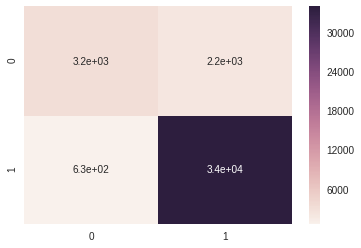

In [0]:
import seaborn as sns
print(cm)
sns.heatmap(cm,annot=True)

In [0]:
C_values=[1000,100,1,0.01,0.001,0.0001]
for val in C_values:
  clf=LogisticRegression(C=val, class_weight={-1: 8, 1: 2},penalty='l1')
  clf.fit(X_train_2,y_train)
  w=clf.coef_
  count = np.count_nonzero(w)
  lamda=1/val
  print("Number of Non-Zero Coefficients for lamda = {} is {}".format(lamda,count))

Number of Non-Zero Coefficients for lamda = 0.001 is 15179
Number of Non-Zero Coefficients for lamda = 0.01 is 12314
Number of Non-Zero Coefficients for lamda = 1.0 is 4592
Number of Non-Zero Coefficients for lamda = 100.0 is 25
Number of Non-Zero Coefficients for lamda = 1000.0 is 0
Number of Non-Zero Coefficients for lamda = 10000.0 is 0


In [63]:
estimator1=LogisticRegression(C=100,
          dual=False, fit_intercept=True, intercept_scaling=1,
          max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2',
          random_state=None, solver='liblinear', tol=0.0001, verbose=0,
          warm_start=False)
estimator1.fit(X_train_2,y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [82]:
X_train_2.shape

(60000, 815007)

In [84]:
len(estimator1.coef_[0])

815007

In [0]:
estimator1_features=[abs(x) for x in estimator1.coef_]
estimator1_indeces=np.argsort(estimator1_features)
print("indecesfirst 10 importent features in AVG Word to vec are ")
print(estimator1_indeces.flatten()[0:10])
print("feature Weights are")
print(np.sort(estimator1_features).flatten()[0:10])

In [0]:
X_train_2.data=+np.random.normal(0, 0.01,3820153)

In [0]:
estimator2=LogisticRegression(C=100,
          dual=False, fit_intercept=True, intercept_scaling=1,
          max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2',
          random_state=None, solver='liblinear', tol=0.0001, verbose=0,
          warm_start=False)
estimator2.fit(X_train_2,y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
coef=estimator1.coef_.flatten()

In [86]:
len(coef1)

815007

In [0]:
coef1=estimator1.coef_.flatten()

coef2=estimator2.coef_.flatten()

percentage_changes=[]
for i in range(len(coef1)):
  diff=(coef1[i]-coef2[i])/coef1[i]
  percentage_changes.append(diff*100)
  

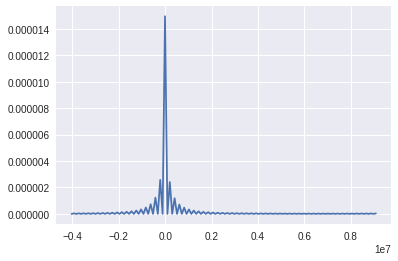

In [0]:
sns.kdeplot(np.array(percentage_changes))

Text(0,0.5,'% change in weights')

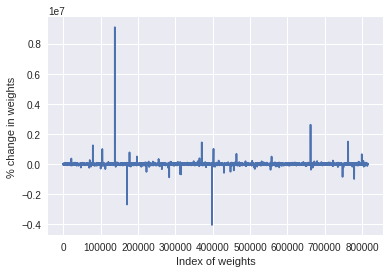

In [0]:

plt.plot(range(0,815007),percentage_changes)
plt.xlabel("Index of weights")
plt.ylabel("% change in weights")

*There  is no much percentage change in Weights so there is no much multicolinearity among the weights *

In [0]:


coef1=[abs(x) for x in coef]
indeces_weights=np.array(coef1).argsort()

weights=np.take(coef,indeces_weights[-20:])

In [0]:
sign=[]
for val in weights:
  if val>0:
    sign.append("+")
  else:
    sign.append("-")

importent_features=np.take(tf_idf_vect.get_feature_names(),indeces_weights[-20:])

In [0]:
positive_features=[]
negative_features=[]
for i,val in enumerate(sign):
  if val=="+":
    positive_features.append(importent_features[i])
  else:
    negative_features.append(importent_features[i])

In [94]:
print("Importent Positive Features")
print(positive_features)
print("Importent Negative Features")
print(negative_features)

Importent Positive Features
['amaz', 'high recommend', 'good', 'nice', 'excel', 'perfect', 'love', 'delici', 'best', 'great']
Importent Negative Features
['weak', 'return', 'threw', 'unfortun', 'horribl', 'bland', 'aw', 'terribl', 'worst', 'disappoint']


# Word to Vec

In [0]:
i=0
list_of_sent=[]
for sent in train_data['CleanedText'].values:
    list_of_sent.append(sent.split())

In [0]:
len(list_of_sent)

60000

In [0]:
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)

In [0]:
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  9957
sample words  ['witti', 'littl', 'book', 'make', 'son', 'laugh', 'loud', 'car', 'drive', 'along', 'alway', 'sing', 'refrain', 'hes', 'learn', 'whale', 'india', 'droop', 'love', 'new', 'word', 'introduc', 'silli', 'classic', 'will', 'bet', 'still', 'abl', 'memori', 'colleg', 'rememb', 'see', 'show', 'air', 'televis', 'year', 'ago', 'child', 'sister', 'later', 'bought', 'day', 'thirti', 'someth', 'use', 'seri', 'song', 'student', 'teach', 'preschool']


# AVG WORD2VEC

In [0]:
sent_vectors = []
for sent in list_of_sent:
    sent_vec = np.zeros(50) 
    cnt_words =0; 
    for word in sent: 
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)


In [0]:
test_list_of_sent=[]
for sent in test_data['CleanedText'].values:
    test_list_of_sent.append(sent.split())

In [0]:
test_sent_vectors = []
for sent in test_list_of_sent:
    sent_vec = np.zeros(50) 
    cnt_words =0; 
    for word in sent: 
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    test_sent_vectors.append(sent_vec)

In [0]:
len(test_sent_vectors)

40000

In [0]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_3=scaler.fit_transform(sent_vectors)

In [0]:
def transform(x):
  if x=='positive':
    return 1
  else:
    return -1

In [0]:
"""X_test_3=scaler.transform(test_sent_vectors)
y_=train_data['Score'].apply(transform)
y_test=test_data['Score'].apply(transform)
y_train=np.array(y_)
y_test=np.array(y_test)"""

In [0]:
y_.value_counts()

 1    53147
-1     6853
Name: Score, dtype: int64

In [0]:
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [0]:
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]
clf=LogisticRegression()
model = GridSearchCV(clf, tuned_parameters, scoring = 'f1', cv=5,n_jobs=4)
model.fit(X_train_3, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid=[{'C': [0.0001, 0.01, 1, 100, 10000]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='f1', verbose=0)

In [0]:
print(model.best_estimator_)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [0]:
model.grid_scores_

[mean: 0.94407, std: 0.00126, params: {'C': 0.0001},
 mean: 0.94867, std: 0.00165, params: {'C': 0.01},
 mean: 0.94886, std: 0.00165, params: {'C': 1},
 mean: 0.94885, std: 0.00165, params: {'C': 100},
 mean: 0.94885, std: 0.00165, params: {'C': 10000}]

In [0]:
print(model.score(X_test_3, y_test))

0.9406550042379357


In [0]:
clf=LogisticRegression()
C=np.random.uniform(10**-4,10**3,size=20)
hyperparameters = dict(C=C)
model = RandomizedSearchCV(clf,param_distributions=hyperparameters, refit=True,scoring ='f1', cv=5,n_jobs=4)
model.fit(X_train_3, y_train)


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=4,
          param_distributions={'C': array([761.38894, 649.39078,  12.96385, 355.82295, 828.1366 , 740.04104,
       729.21792, 299.86365,  59.69493, 214.78482, 875.45643, 930.79834,
       832.81259,  98.85341, 129.20964, 719.06808, 154.70298, 430.27046,
       818.17646, 653.28165])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='f1', verbose=0)

In [0]:
model.grid_scores_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.92147, std: 0.00286, params: {'C': 576.3242924593294},
 mean: 0.92147, std: 0.00286, params: {'C': 750.1740492127403},
 mean: 0.92147, std: 0.00286, params: {'C': 694.8383337009154},
 mean: 0.92147, std: 0.00286, params: {'C': 56.891618274565715},
 mean: 0.92147, std: 0.00286, params: {'C': 438.3061531550612},
 mean: 0.92147, std: 0.00286, params: {'C': 637.7022820600168},
 mean: 0.92147, std: 0.00286, params: {'C': 608.2980192213316},
 mean: 0.92147, std: 0.00286, params: {'C': 818.0865789132426},
 mean: 0.92147, std: 0.00286, params: {'C': 617.0758711094217},
 mean: 0.92147, std: 0.00286, params: {'C': 843.592787584425}]

In [0]:
print(model.best_estimator_)

LogisticRegression(C=430.2704592165484, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


In [0]:
from sklearn.metrics import confusion_matrix
lgr=LogisticRegression(C=1, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
lgr.fit(X_train_3,y_train)
y_pred=lgr.predict(X_test_3)
cm=confusion_matrix(y_test,y_pred)
print("CM for L1")
cm

CM for L1


array([[ 1878,  3540],
       [  731, 33851]])

In [0]:
from sklearn.metrics import confusion_matrix
lgr=LogisticRegression(C=1, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
lgr.fit(X_train_3,y_train)
y_pred=lgr.predict(X_test_3)
cm=confusion_matrix(y_test,y_pred)
print("CM for L2")
cm

CM for L2


array([[ 1880,  3538],
       [  733, 33849]])

CM for GridSearch
[[ 1880  3538]
 [  733 33849]]


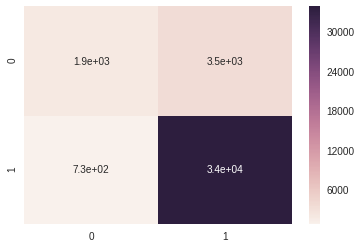

In [0]:
print("CM for GridSearch")
import seaborn as sns
print(cm)
sns.heatmap(cm,annot=True)

In [0]:
C_values=[1000,500,100,10,1,0.1,0.001,0.0001]

In [0]:
for val in C_values:
  clf=LogisticRegression(C=val,penalty='l1')
  clf.fit(X_train_3,y_train)
  w=clf.coef_
  count = np.count_nonzero(w)
  lamda=1/val
  print("Number of Non-Zero Coefficients for lamda = {} is {}".format(lamda,count))
  

Number of Non-Zero Coefficients for lamda = 0.001 is 50
Number of Non-Zero Coefficients for lamda = 0.002 is 50
Number of Non-Zero Coefficients for lamda = 0.01 is 50
Number of Non-Zero Coefficients for lamda = 0.1 is 50
Number of Non-Zero Coefficients for lamda = 1.0 is 50
Number of Non-Zero Coefficients for lamda = 10.0 is 50
Number of Non-Zero Coefficients for lamda = 1000.0 is 16
Number of Non-Zero Coefficients for lamda = 10000.0 is 0


 *Check for Multicollinearity*

In [0]:
estimator1=LogisticRegression(C=1, 
          dual=False, fit_intercept=True, intercept_scaling=1,
          max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2',
          random_state=None, solver='liblinear', tol=0.0001, verbose=0,
          warm_start=False)
estimator1.fit(X_train_3,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
estimator1_features=[abs(x) for x in estimator1.coef_]
estimator1_features=np.argsort(estimator1_features)
print("first 10 importent features in AVG Word to vec are ")
print(estimator1_features.flatten()[0:10])


first 10 importent features in AVG Word to vec are 
[42 24 13 39  5 28 22 35 21 10]


In [0]:
X_train_3.shape

(60000, 50)

In [0]:
Noice = np.random.normal(0, 0.01, 60000)
Noice=Noice.reshape(-1,1)
X_train_31=X_train_3+Noice

In [0]:
X_train_31=X_train_3+Noice

In [0]:
estimator2=LogisticRegression(C=1,
          dual=False, fit_intercept=True, intercept_scaling=1,
          max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2',
          random_state=None, solver='liblinear', tol=0.0001, verbose=0,
          warm_start=False)
estimator2.fit(X_train_31,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
estimator2_features=[abs(x) for x in estimator2.coef_]
estimator2_features=np.argsort(estimator2_features)
print("first 10 importent features in AVG Word to vec are ")
print(estimator2_features.flatten()[0:10])

first 10 importent features in AVG Word to vec are 
[42 24 13 39  5 28 22 35 21 10]


In [0]:
coef1=estimator1.coef_.flatten()

coef2=estimator2.coef_.flatten()

In [0]:
percentage_changes=[]
for i in range(len(coef1)):
  diff=(coef1[i]-coef2[i])/coef1[i]
  percentage_changes.append(diff*100)

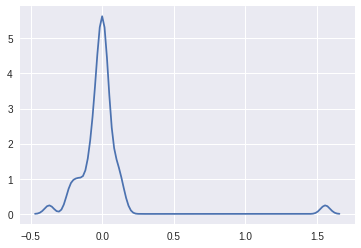

In [0]:
sns.kdeplot(np.array(percentage_changes))

Text(0,0.5,'% change in weights')

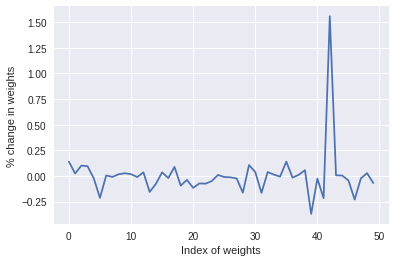

In [0]:
plt.plot(range(0,50),percentage_changes)
plt.xlabel("Index of weights")
plt.ylabel("% change in weights")

*There  is no much percentage change in Weights so there is no much multicolinearity among the weights *

# TF-IDF Word2Vec

In [0]:
tfidf_feat = tf_idf_vect.get_feature_names()

In [0]:
tfidf_sent_vectors = []
row=33000;
for sent in list_of_sent[33000:37000]: 
    sent_vec = np.zeros(50)
    weight_sum =0
    for word in sent: 
        if word in w2v_words:
            vec = w2v_model.wv[word]
           
            tf_idf = final_tf_idf[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
  
    if  row%500==0:
      print(row)
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

**Tranforming Test Data**

In [0]:
test_tfidf_sent_vectors = []
row=33000;
for sent in test_list_of_sent: 
    sent_vec = np.zeros(50)
    weight_sum =0
    for word in sent: 
        if word in w2v_words:
            vec = w2v_model.wv[word]
           
            tf_idf = test_final_tf_idf[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
  
    if  row%500==0:
      print(row)
    if weight_sum != 0:
        sent_vec /= weight_sum
    test_tfidf_sent_vectors.append(sent_vec)
    row += 1

In [100]:
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]
clf=LogisticRegression()
model = GridSearchCV(clf, tuned_parameters, scoring = 'f1', cv=5,n_jobs=4)
model.fit(tfidf_sent_vectors, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid=[{'C': [0.0001, 0.01, 1, 100, 10000]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='f1', verbose=0)

In [101]:
print(model.best_estimator_)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


In [102]:
model.grid_scores_

[mean: 0.93877, std: 0.00099, params: {'C': 0.0001},
 mean: 0.93725, std: 0.00363, params: {'C': 0.01},
 mean: 0.93592, std: 0.00551, params: {'C': 1},
 mean: 0.93590, std: 0.00555, params: {'C': 100},
 mean: 0.93590, std: 0.00555, params: {'C': 10000}]

In [104]:
print(model.score(test_tfidf_sent_vectors, y_test))

0.9159046130851282


In [130]:
#from scipy.stats import uniform
clf=LogisticRegression()
#penalty = ['l1', 'l2']
#uniform(loc=10**-4, scale=10**2)
C=np.random.uniform(10**-4,100*4,size=20)
hyperparameters = dict(C=C)
#params={'C': [randint.rvs(10**-4,200)]}
model = RandomizedSearchCV(clf,param_distributions=hyperparameters, refit=True,scoring ='f1', cv=5,n_jobs=4)
model.fit(tfidf_sent_vectors, y_train)


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=4,
          param_distributions={'C': array([281.19491,  26.70387, 331.30587,  14.67778, 235.31409,  33.86174,
       311.74824,  40.37749, 352.95217, 368.03308, 280.55003, 134.70405,
       235.36443,  69.61209,  94.78104, 337.92893, 243.06547,  49.66494,
       294.00291, 340.96079])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='f1', verbose=0)

In [131]:
print(model.best_estimator_)

LogisticRegression(C=49.664943758413756, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


In [0]:
X_train_4=tfidf_sent_vectors
X_test_4=test_tfidf_sent_vectors

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import f1_score

In [111]:
from sklearn.metrics import confusion_matrix
lgr=LogisticRegression(C=400, class_weight={-1:8.2,1:2}, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
lgr.fit(X_train_4,y_train)
y_pred=lgr.predict(X_test_4)
cm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)
print("Metrics for L1")
print(acc)
print(cm)

Metrics for L1
0.789825
[[  760  4658]
 [ 3749 30833]]


In [0]:
#from sklearn.metrics import confusion_matrix
lgr=LogisticRegression(C=400, class_weight={-1:8.2,1:2}, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
lgr.fit(X_train_4,y_train)
y_pred=lgr.predict(X_test_4)
cm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)
print("Metrics for L2")
print(acc)
print(cm)

Metrics for L2
0.78985
[[  760  4658]
 [ 3748 30834]]


0.78985
[[  760  4658]
 [ 3748 30834]]


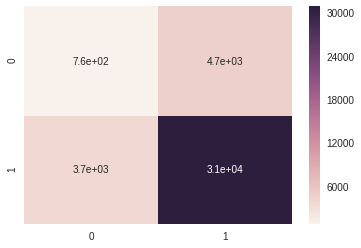

In [0]:
print(acc)
print(cm)
sns.heatmap(cm,annot=True)

In [0]:
for val in C_values:
  clf=LogisticRegression(C=val, class_weight={-1: 8, 1: 2},penalty='l1')
  clf.fit(X_train_4,y_train)
  w=clf.coef_
  count = np.count_nonzero(w)
  lamda=1/val
  print("Number of Non-Zero Coefficients for lamda = {} is {}".format(lamda,count))
  

Number of Non-Zero Coefficients for lamda = 0.001 is 50
Number of Non-Zero Coefficients for lamda = 0.01 is 50
Number of Non-Zero Coefficients for lamda = 0.1 is 50
Number of Non-Zero Coefficients for lamda = 1.0 is 50
Number of Non-Zero Coefficients for lamda = 10.0 is 50
Number of Non-Zero Coefficients for lamda = 100.0 is 50
Number of Non-Zero Coefficients for lamda = 1000.0 is 31
Number of Non-Zero Coefficients for lamda = 10000.0 is 0


In [112]:
estimator1=LogisticRegression(C=400, class_weight={-1: 8, 1: 2},
          dual=False, fit_intercept=True, intercept_scaling=1,
          max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2',
          random_state=None, solver='liblinear', tol=0.0001, verbose=0,
          warm_start=False)
estimator1.fit(X_train_4,y_train)

LogisticRegression(C=400, class_weight={-1: 8, 1: 2}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [0]:
estimator1_features=[abs(x) for x in estimator1.coef_]
estimator1_indeces=np.argsort(estimator1_features)
print("indecesfirst 10 importent features in AVG Word to vec are ")
print(estimator1_indeces.flatten()[0:10])
print("feature Weights are")
print(np.sort(estimator1_features).flatten()[0:10])

indecesfirst 10 importent features in AVG Word to vec are 
[43  0 30 17 47 44 13 35 19 25]
feature Weights are
[0.01096742 0.01156549 0.01557108 0.02325508 0.02340417 0.02430732
 0.02758449 0.02806372 0.03310584 0.03393921]


In [0]:
Noice = np.random.normal(0, 0.01, 60000)
Noice=Noice.reshape(-1,1)
X_train_41=X_train_4+Noice

In [114]:
estimator2=LogisticRegression(C=400, class_weight={-1: 8, 1: 2},
          dual=False, fit_intercept=True, intercept_scaling=1,
          max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2',
          random_state=None, solver='liblinear', tol=0.0001, verbose=0,
          warm_start=False)
estimator2.fit(X_train_41,y_train)

LogisticRegression(C=400, class_weight={-1: 8, 1: 2}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [0]:
coef1=estimator1.coef_.flatten()

coef2=estimator2.coef_.flatten()



percentage_changes=[]
for i in range(len(coef1)):
  diff=(coef1[i]-coef2[i])/coef1[i]
  percentage_changes.append(diff*100)

In [0]:
for val in percentage_changes:
  if val>30:
    
    print(val)
    

*There  is no much percentage change in Weights so there is no much multicolinearity among the weights *

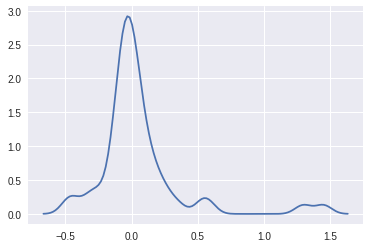

In [123]:
sns.kdeplot(np.array(percentage_changes))


In [0]:
estimator2_features=[abs(x) for x in estimator2.coef_]

Text(0,0.5,'% change in weights')

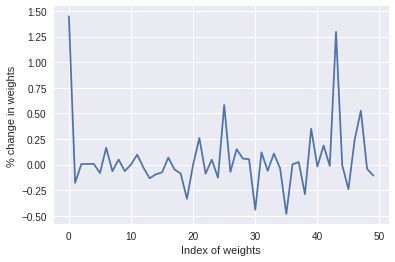

In [125]:
plt.plot(range(0,50),percentage_changes)
plt.xlabel("Index of weights")
plt.ylabel("% change in weights")

#Conclusion

In [0]:
!pip install prettytable
from prettytable import PrettyTable
    


In [133]:
x = PrettyTable()

x.field_names = ["Model", "C","Penalty", "Train Error", "Test Error"]

x.add_row(["Bag of words", "RandomSearch : 0.1, Gridsearch :0.5 ","L1",95.4, 93.6])
x.add_row(["TF_IDF", "RandomSearch : 0100, Gridsearch :576 ","L1",96.34, 93.33])
x.add_row(["AVG-W2VEC", "RandomSearch : 1, Gridsearch :400 ","L1",94.4, 94.6])
x.add_row([" Weighted TF_IDF", "RandomSearch : 0.001, Gridsearch :43 ","L1",93.34, 91.33])
print(x)

+------------------+---------------------------------------+---------+-------------+------------+
|      Model       |                   C                   | Penalty | Train Error | Test Error |
+------------------+---------------------------------------+---------+-------------+------------+
|   Bag of words   |  RandomSearch : 0.1, Gridsearch :0.5  |    L1   |     95.4    |    93.6    |
|      TF_IDF      | RandomSearch : 0100, Gridsearch :576  |    L1   |    96.34    |   93.33    |
|    AVG-W2VEC     |   RandomSearch : 1, Gridsearch :400   |    L1   |     94.4    |    94.6    |
|  Weighted TF_IDF | RandomSearch : 0.001, Gridsearch :43  |    L1   |    93.34    |   91.33    |
+------------------+---------------------------------------+---------+-------------+------------+
